In [1]:
%pylab inline 
%load_ext autoreload
%autoreload 2
from lenstools import ConvergenceMap , ShearMap
import lenstools
import sys
sys.path.insert(0,'/Users/dl264294/Desktop/github/flowpm/')
sys.path.insert(0,'/Users/dl264294/Desktop/github/DifferentiableHOS/')
sys.path.insert(0,'/Users/dl264294/.conda/envs/env_nbody/lib/python3.8/site-packages/lenstools/')
from lenstools.utils.defaults import load_fits_default_convergence, measure_power_spectrum
from lenstools.simulations import PotentialPlane,RayTracer,DensityPlane, Plane
from DifferentiableHOS.angular_power_tf import measure_power_spectrum_tf
from astropy.io import fits
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.units import deg,Mpc,m,lyr
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
tracer = RayTracer(lens_mesh_size=64)

In [3]:
for i in range(9):
    header=Plane.readHeader("/Users/dl264294/Desktop/github/flowpm/notebooks/export_lens_plans"+str(i)+'.fits')
    lens_specification=("/Users/dl264294/Desktop/github/flowpm/notebooks/export_lens_plans"+str(i)+'.fits',header['CHI']* Mpc, 1.0)
    tracer.addLens(lens_specification)

Text(0.5, 1.0, 'Projected matter density $\\sigma$')

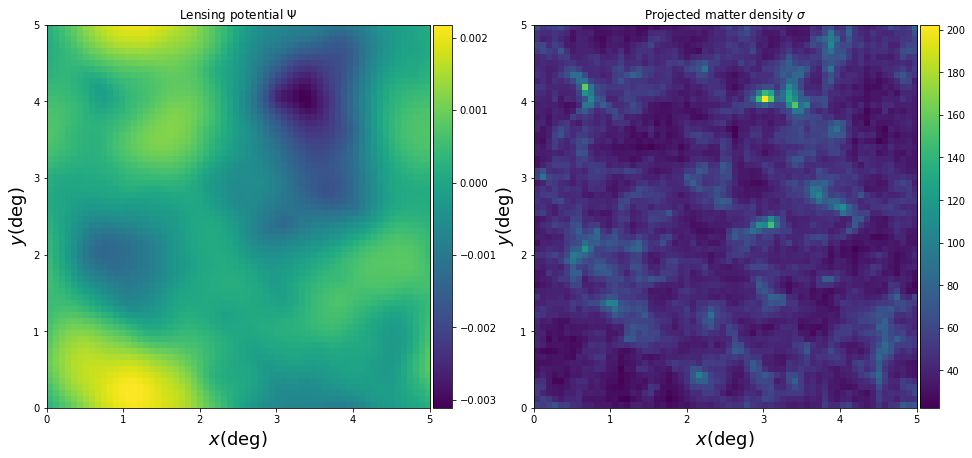

In [14]:
fig,ax = plt.subplots(1,2,figsize=(16,8))

#Compute and visualize the density and corresponding lensing potential
DensityPlane.load(tracer.lens[0]).potential().visualize(fig,ax[0],colorbar=True)
DensityPlane.load(tracer.lens[0]).visualize(fig,ax[1],colorbar=True)

ax[0].set_title(r"Lensing potential $\Psi$")
ax[1].set_title(r"Projected matter density $\sigma$")
#savefig('lens.png',dpi=80)

In [ ]:
#Random things 

In [7]:
test=fits.open('/Users/dl264294/Downloads/Maps10/WLonv/WLconv_z1.00_0001r.fits')
data=test[0].data

In [8]:
test_map = ConvergenceMap.load("/Users/dl264294/Downloads/Maps10/WLonv/WLconv_z1.00_0001r.fits")
l_edges = np.arange(200.0,5000.0,200.0)
l,Pl = test_map.powerSpectrum(l_edges)
ell, ps_example = measure_power_spectrum_tf(tf.cast(data,dtype=tf.complex64),3.5,515)

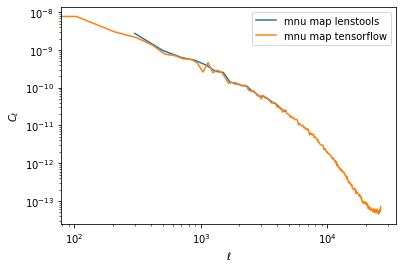

In [9]:
loglog(l, Pl, label='mnu map lenstools')
loglog(ell, ps_example, label='mnu map tensorflow')
xlabel('$\ell$')
ylabel('$C_{\ell}$')
legend()

In [10]:
test_k=fits.open('/Users/dl264294/Desktop/github/flowpm/notebooks/export_lens.fits')
data_k=test_k[0].data

In [11]:
test_kmap= ConvergenceMap.load('/Users/dl264294/Desktop/github/flowpm/notebooks/export_lens.fits')

In [12]:
l_edges_kmap = np.arange(200.0,5000.0,200.0)
l_k,Pl_k = test_kmap.powerSpectrum(l_edges_kmap)
ell_k, ps_example_k = measure_power_spectrum_tf(tf.cast(data_k,dtype=tf.complex64),5.,64)

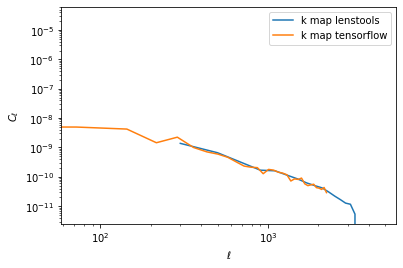

In [13]:
loglog(l_k,Pl_k ,label='k map lenstools')
loglog(ell_k, ps_example_k, label='k map tensorflow')
xlabel('$\ell$')
ylabel('$C_{\ell}$')
savefig('power_an.png',dpi=80)
legend()